<a href="https://colab.research.google.com/github/ShehanJay19/Human-Face-Emotion-Detection-app/blob/main/Human_Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install opendatasets

In [63]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import opendatasets as od
import os
import random
import shutil


In [64]:
od.download('https://www.kaggle.com/datasets/samithsachidanandan/human-face-emotions')

Skipping, found downloaded files in "./human-face-emotions" (use force=True to force download)


In [65]:
BATCH_SIZE=32
IMG_SIZE=(128,128)

In [66]:
data_dir='/content/human-face-emotions/Data'
train_data_dir=data_dir+'/train'
test_data_dir=data_dir+'/test'

In [67]:
from IPython.testing import test
#Split dataset into train and test
split_ratio=0.8

emotions =['Angry','Fear','Happy','Sad','Suprise']

for folder in [train_data_dir,test_data_dir]:
  if not os.path.exists(folder):
    os.makedirs(folder)

for emotion in emotions:
    os.makedirs(os.path.join(train_data_dir,emotion),exist_ok=True)
    os.makedirs(os.path.join(test_data_dir,emotion), exist_ok=True)

    files=os.listdir(os.path.join(data_dir,emotion))
    random.shuffle(files)

    split_point=int(len(files)*split_ratio)
    train_files=files[:split_point]
    test_files=files[split_point:]

    for file in train_files:
       shutil.copy(
           os.path.join(data_dir,emotion,file),
           os.path.join(train_data_dir,emotion,file)
       )
    for file in test_files:
       shutil.copy(
           os.path.join(data_dir,emotion,file),
           os.path.join(test_data_dir,emotion,file)
       )



In [68]:
#Sparate Data in o test and train

train_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMG_SIZE,
                                                      subset='training',
                                                      validation_split=0.1,
                                                      seed=42)

validation_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMG_SIZE,
                                                      subset='validation',
                                                      validation_split=0.1,
                                                      seed=42)
test_data=tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMG_SIZE)


Found 58624 files belonging to 5 classes.
Using 52762 files for training.
Found 58624 files belonging to 5 classes.
Using 5862 files for validation.
Found 28808 files belonging to 5 classes.


In [69]:
class_names=train_data.class_names
class_names

['Angry', 'Fear', 'Happy', 'Sad', 'Suprise']

In [70]:
for img_batch,label_batch in train_data.take(1):
  print(img_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


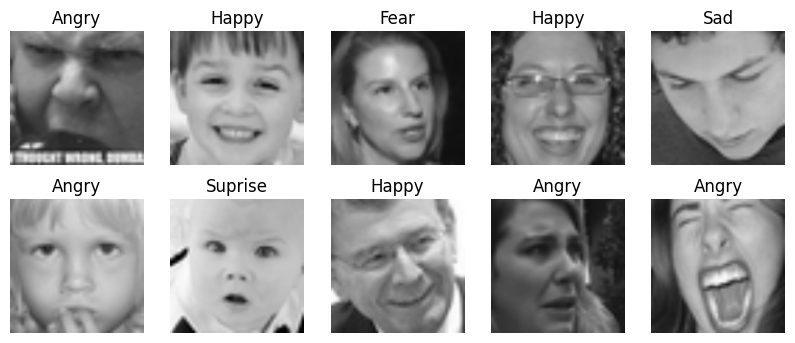

In [71]:
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [72]:
for image,label in train_data.take(1):
  for i in range(1):
    print (image)

tf.Tensor(
[[[[ 15.        15.        15.      ]
   [ 15.375     15.375     15.375   ]
   [ 17.625     17.625     17.625   ]
   ...
   [ 62.3125    62.3125    62.3125  ]
   [ 67.1875    67.1875    67.1875  ]
   [ 68.        68.        68.      ]]

  [[ 15.        15.        15.      ]
   [ 15.347656  15.347656  15.347656]
   [ 17.433594  17.433594  17.433594]
   ...
   [ 62.003906  62.003906  62.003906]
   [ 66.71484   66.71484   66.71484 ]
   [ 67.5       67.5       67.5     ]]

  [[ 15.        15.        15.      ]
   [ 15.183594  15.183594  15.183594]
   [ 16.285156  16.285156  16.285156]
   ...
   [ 60.152344  60.152344  60.152344]
   [ 63.878906  63.878906  63.878906]
   [ 64.5       64.5       64.5     ]]

  ...

  [[143.8125   143.8125   143.8125  ]
   [143.92969  143.92969  143.92969 ]
   [144.63281  144.63281  144.63281 ]
   ...
   [183.42969  183.42969  183.42969 ]
   [185.63281  185.63281  185.63281 ]
   [186.       186.       186.      ]]

  [[145.6875   145.6875   145.6875

In [73]:
train_data=train_data.map(lambda x,y:(x/255,y))
validation_data=validation_data.map(lambda x,y:(x/255,y))
test_data=test_data.map(lambda x,y:(x/255,y))

In [74]:
for image,label in train_data.take(1):
  for i in range(1):
    print (image)

tf.Tensor(
[[[[0.44705883 0.44705883 0.44705883]
   [0.45171568 0.45171568 0.45171568]
   [0.47965688 0.47965688 0.47965688]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  [[0.4495098  0.4495098  0.4495098 ]
   [0.4541054  0.4541054  0.4541054 ]
   [0.48167893 0.48167893 0.48167893]
   ...
   [0.99583334 0.99583334 0.99583334]
   [0.99583334 0.99583334 0.99583334]
   [0.99583334 0.99583334 0.99583334]]

  [[0.4642157  0.4642157  0.4642157 ]
   [0.46844363 0.46844363 0.46844363]
   [0.49381128 0.49381128 0.49381128]
   ...
   [0.9943628  0.9943628  0.9943628 ]
   [0.9943628  0.9943628  0.9943628 ]
   [0.9943628  0.9943628  0.9943628 ]]

  ...

  [[0.24681373 0.24681373 0.24681373]
   [0.24512868 0.24512868 0.24512868]
   [0.23501839 0.23501839 0.23501839]
   ...
   [0.4030484  0.4030484  0.4030484 ]
   [0.25589767 0.25589767 0.25589767]
   [0.23137255 0.23137255 0.23137255]]

  [[0.23357843 0.23357843 0.233578

In [75]:
data_augmentatiom=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal',input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2)
])

In [76]:
#model building
model=tf.keras.models.Sequential()
model.add(data_augmentatiom)

model.add(tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(5, activation='softmax'))



In [77]:
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)       │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,325,445 (12.69 MB)

 Trainable params: 3,325,445 (12.69 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy']
)

In [79]:

#train model
history=model.fit(train_data,epochs=30,validation_data=validation_data)


Epoch 1/30
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 96s 56ms/step - accuracy: 0.3223 - loss: 1.5426 - val_accuracy: 0.3825 - val_loss: 1.4537
Epoch 2/30
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 90s 55ms/step - accuracy: 0.3952 - loss: 1.4240 - val_accuracy: 0.4558 - val_loss: 1.2849
Epoch 3/30
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 87s 52ms/step - accuracy: 0.4615 - loss: 1.2862 - val_accuracy: 0.4922 - val_loss: 1.2218
Epoch 4/30
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 89s 54ms/step - accuracy: 0.4918 - loss: 1.2171 - val_accuracy: 0.5377 - val_loss: 1.1366
Epoch 5/30
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 89s 54ms/step - accuracy: 0.5215 - loss: 1.1593 - val_accuracy: 0.5510 - val_loss: 1.1118
Epoch 6/30
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 86s 52ms/step - accuracy: 0.5334 - loss: 1.1257 - val_accuracy: 0.5628 - val_loss: 1.0718
Epoch 7/30
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 85s 52ms/step - accuracy: 0.5523 - loss: 1.0989 - val_accuracy: 0.5751 - val_loss: 1.0416
Epoch 8/30
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 87s 53ms/step - accuracy: 0.5607 -

KeyboardInterrupt: 